In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Menyiapkan data

In [2]:
# Mengambil dataset 'bank-additional-full'
path = 'C:/Users/felic/OneDrive - mikroskil.ac.id/Kuliah/Semester 7 (MSIB)/Tugas/Data/bank-additional-full.csv'
df_bank = pd.read_csv(path, sep=';')
pd.set_option('display.max_columns', None)

In [3]:
# Membuat dataset copy dari df_bank
dataset = df_bank
dataset.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
# Melihat informasi dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Mengecek apakah terdapat data null pada dataset
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# Mengecek apakah terdapat data duplikat pada dataset
dataset.duplicated().sum()

12

In [7]:
# Membuang semua data duplikat pada dataset
dataset.drop_duplicates(inplace = True)

# Mengecek apakah terdapat data duplikat pada dataset
dataset.duplicated().sum()

0

In [8]:
# Mengecek ukuran dataset
dataset.shape

(41176, 21)

##### Berdasarkan keterangan dataset, terdapat beberapa kolom yang berisi data 'unknown'. Diantaranya adalah kolom job, marital, education, default, housing, loan. Oleh karena itu, data tersebut akan diganti menjadi modus data kolom terlebih dahulu.

##### Kolom Job

In [9]:
# Melihat jumlah data dalam kolom 
dataset['job'].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [10]:
# Mengubah data 'unknown' menjadi data modus pada kolom
dataset['job'] = dataset['job'].replace('unknown', dataset['job'].mode()[0])

# Melihat data dalam kolom 
dataset['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

##### Kolom Marital

In [11]:
# Melihat jumlah data dalam kolom 
dataset['marital'].value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [12]:
# Mengubah data 'unknown' menjadi data modus pada kolom
dataset['marital'] = dataset['marital'].replace('unknown', dataset['marital'].mode()[0])

# Melihat data dalam kolom 
dataset['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

##### Kolom Education

In [13]:
# Melihat jumlah data dalam kolom 
dataset['education'].value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [14]:
# Mengubah data 'unknown' menjadi data modus pada kolom
dataset['education'] = dataset['education'].replace('unknown', dataset['education'].mode()[0])

# Melihat data dalam kolom 
dataset['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

##### Kolom Default

In [15]:
# Melihat jumlah data dalam kolom 
dataset['default'].value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

In [16]:
# Mengubah data 'unknown' menjadi data modus pada kolom
dataset['default'] = dataset['default'].replace('unknown', dataset['default'].mode()[0])

# Melihat data dalam kolom 
dataset['default'].unique()

array(['no', 'yes'], dtype=object)

##### Kolom Housing

In [17]:
# Melihat jumlah data dalam kolom 
dataset['housing'].value_counts()

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

In [18]:
# Mengubah data 'unknown' menjadi data modus pada kolom
dataset['housing'] = dataset['housing'].replace('unknown', dataset['housing'].mode()[0])

# Melihat data dalam kolom 
dataset['housing'].unique()

array(['no', 'yes'], dtype=object)

##### Kolom Loan

In [19]:
# Melihat jumlah data dalam kolom 
dataset['loan'].value_counts()

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

In [20]:
# Mengubah data 'unknown' menjadi nan
dataset['loan'] = dataset['loan'].replace('unknown', dataset['loan'].mode()[0])

# Melihat data dalam kolom 
dataset['loan'].unique()

array(['no', 'yes'], dtype=object)

In [21]:
# Mengganti nilai yes dan no menjadi 1 dan 0
dataset['default'] = dataset['default'].replace({'yes': 1, 'no': 0})
dataset['housing'] = dataset['housing'].replace({'yes': 1, 'no': 0})
dataset['loan'] = dataset['loan'].replace({'yes': 1, 'no': 0})
dataset['y'] = dataset['y'].replace({'yes': 1, 'no': 0})

##### Distribusi data

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

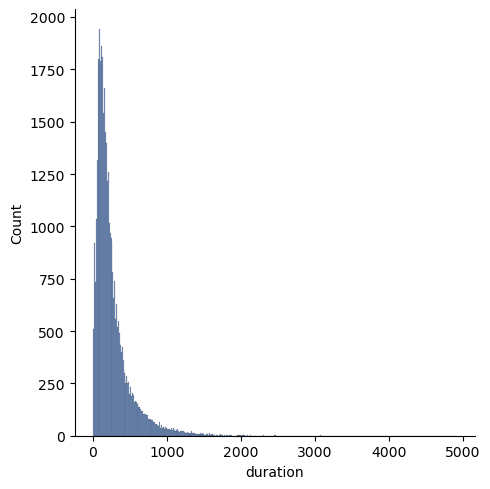

In [22]:
# Melihat distribusi data dari kolom duration
plt.figure(figsize=(5,5))
sns.set_palette("deep")  
sns.displot(dataset["duration"])

Kesimpulan: Bisa dilihat bahwa distribusi data lebih banyak berada daerah bernilai kecil dibandingkan yang besar.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

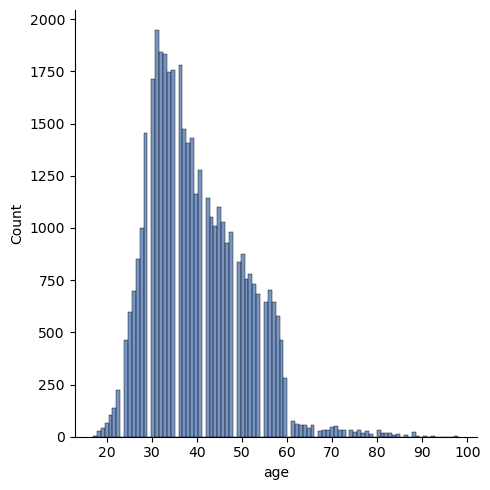

In [23]:
# Melihat distribusi data dari kolom age
plt.figure(figsize=(5,5))
sns.set_palette("deep")  
sns.displot(dataset["age"])

Kesimpulan: Bisa dilihat bahwa kebanyakan orang yang dihubungi adalah mereka yang masih muda dari rentang usia 20 hingga 30.

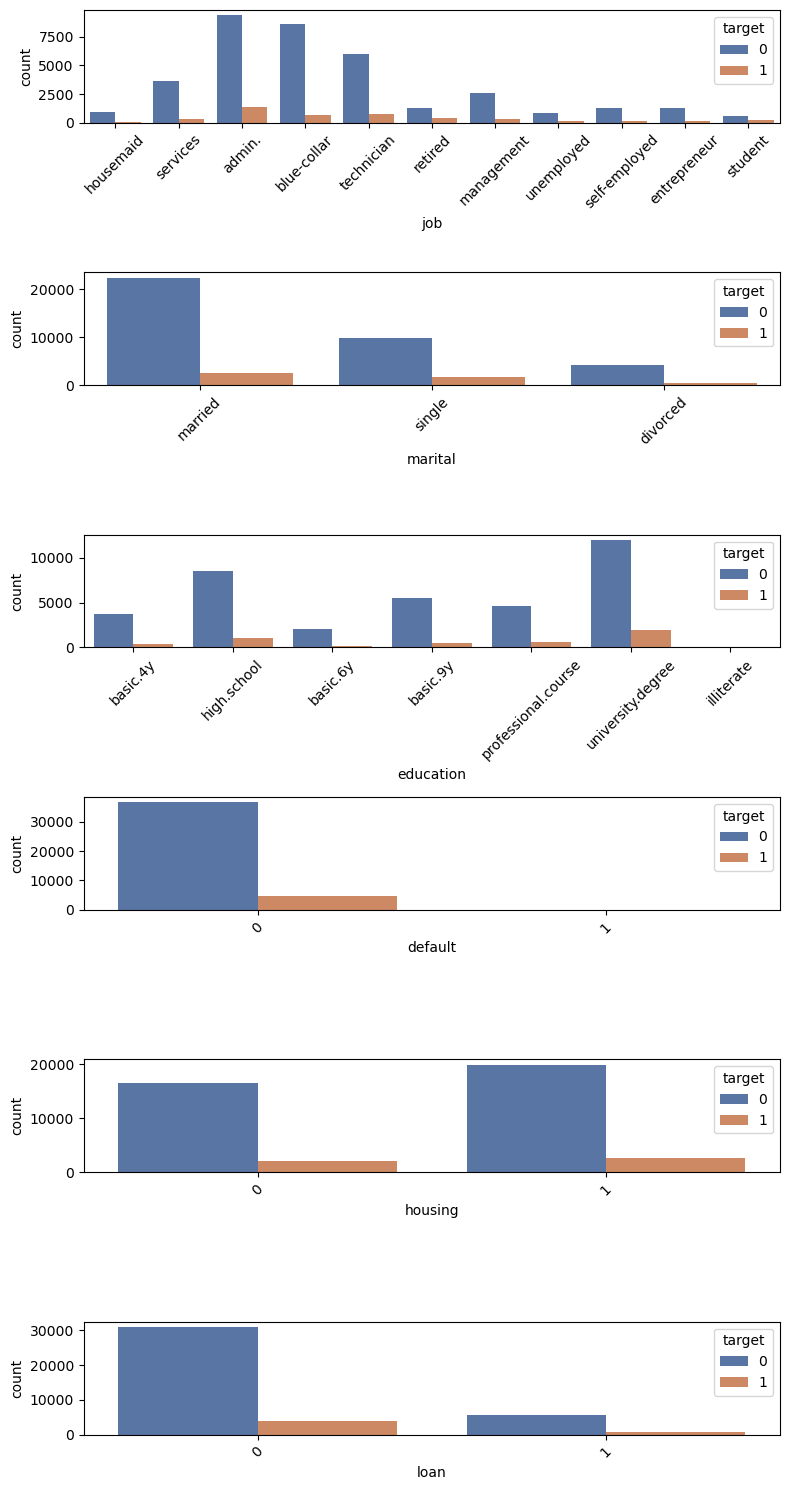

In [24]:
# Melihat distribusi data dari 6 kolom di atas berdasarkan kolom y. (job, marital, education, default, housing, loan)
col = ['job', 'marital', 'education', 'default', 'housing', 'loan']

fig,axis = plt.subplots(6, 1, figsize=(8,15))

for i in range(0,6):
    ax = axis[i]
    sns.set_palette("deep")  
    sns.countplot(x = col[i], hue='y', data = dataset, ax = ax)
    ax.legend(title = 'target', loc = 'upper right')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

##### Proses pemilihan feature

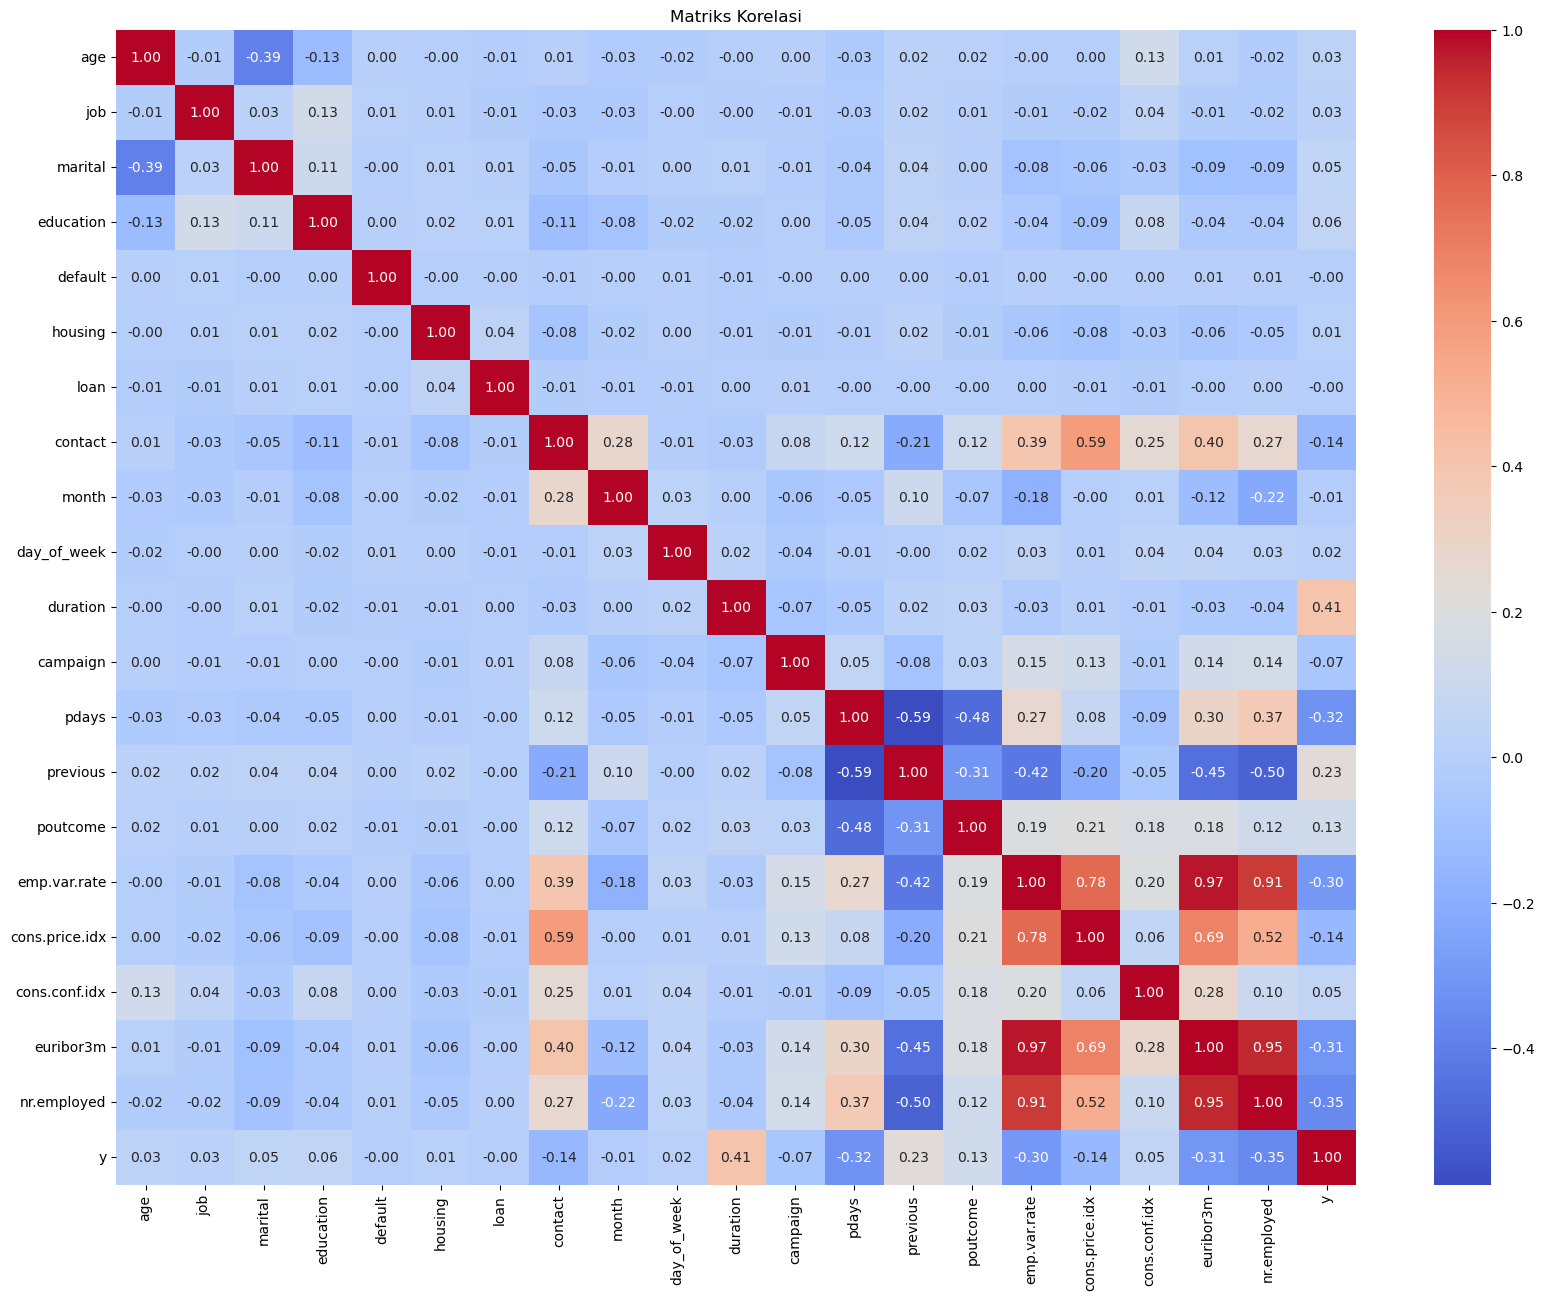

In [25]:
from sklearn.preprocessing import LabelEncoder

# Membuat suatu dataset copy khusus untuk matriks korelasi dan pembuatan model
df_corr = dataset.copy()

# Menggunakan label encoder untuk mengubah variabel kategori menjadi bilangan bulat
label_encoder = LabelEncoder()
for i in dataset.columns:
    if df_corr[i].dtype == 'object':
        df_corr.loc[:, i] = label_encoder.fit_transform(df_corr[i])

# Membuat matriks korelasi
df_corr = df_corr.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

Fitur yang akan dipilih adalah sebagai berikut:
- duration, pdays & nr.employed -> karena memiliki tingkat korelasi yang tinggi dengan y

In [26]:
# Memilih feature
fitur = ['nr.employed', 'duration', 'pdays']

x = dataset[fitur]
y = dataset['y']

In [27]:
# Mengatasi masalah ketidakseimbangan dalam dataset
smote = SMOTE()
x, y = smote.fit_resample(x,y)

# Splitting dataset menjadi train 80% dan test 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=10)

# Skalasi fitur
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model data

## Logistic Regression

In [28]:
# Membuat model Logistic Regression
log = LogisticRegression()

# Melatih model
log.fit(x_train, y_train)

LogisticRegression()

In [29]:
# Melakukan prediksi dengan model yang telah dilatih
y_pred = log.predict(x_test)

# Melihat akurasi model
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model  : ", acc)

Akurasi Model  :  0.8419432090318166


## KNN

In [30]:
# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# Melakukan prediksi dengan model yang telah dilatih
y_pred = knn.predict(x_test)

# Melihat akurasi model
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model  : ", acc)

Akurasi Model  :  0.8639753677728361


## SVM

In [32]:
# Membuat model SVM
svm = SVC(kernel='linear')

# Melatih model
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [33]:
# Melakukan prediksi dengan model yang telah dilatih
y_pred = svm.predict(x_test)

# Melihat akurasi model
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model  : ", acc)

Akurasi Model  :  0.8466643859048922


## Decision Tree

In [34]:
# Membuat model Decision Tree
detree = DecisionTreeClassifier()

# Melatih model
detree.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
# Melakukan prediksi dengan model yang telah dilatih
y_pred = detree.predict(x_test)

# Melihat akurasi model
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model  : ", acc)

Akurasi Model  :  0.8714334587752309


## Random Forest

In [36]:
# Membuat model Random Forest
forest = RandomForestClassifier()

#melatih model Random Forest dengan data pelatihan (_train)
forest.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
# Melakukan prediksi dengan model yang telah dilatih
y_pred = forest.predict(x_test)

# Melihat akurasi model
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model  : ", acc)

Akurasi Model  :  0.8784810126582279


## Naive Bayes

In [38]:
# Membuat model Naive Bayes
naiveBayes = GaussianNB()

# Melatih model Naive Bayes
naiveBayes.fit(x_train, y_train)

GaussianNB()

In [39]:
# Melakukan prediksi dengan model yang telah dilatih
y_pred = naiveBayes.predict(x_test)

# Melihat akurasi model
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model  : ", acc)

Akurasi Model  :  0.7752993499828943


# Analisis

Kesimpulan: 
- Model Logistic Regression memiliki tingkat akurasi sekitar 84%.
- Model KNN memiliki tinggat akurasi yang lebih tinggi dari Model Logistic Regression yaitu 86%.
- Model SVM memiliki tinggat akurasi yang kurang lebih sama dengan Model Logistic Regression yaitu 84%.
- Model Decision Tree memiliki tinggat akurasi yang cukup tinggi yaitu 87%.
- Model Random Forest memiliki tinggat akurasi yang tertinggi dari model-model yang ada yaitu 88%.
- Model Naive Bayes memiliki tinggat akurasi yang terendah dari model-model yang ada yaitu 77%.

Algoritma yang akan saya pilih adalah algoritma Random Forest, karena memiliki beberapa kelebihan yaitu:
- Memiliki tingkat akurasi tertinggi
- Cepat dalam proses training, tidak seperti algoritma SVM
- Dapat menangani nilai yang hilang tanpa pengolahan ekstra
- Menangani baik variabel numerik maupun kategorikal tanpa transformasi khusus

## Confusion Matrix

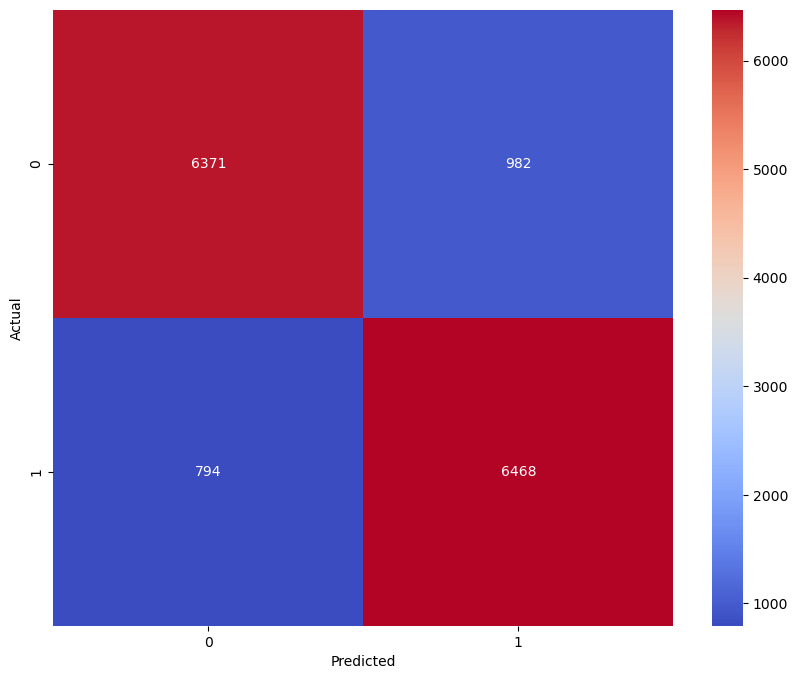

In [40]:
# Mengambil hasil prediksi dari model random forest yang telah dilatih
y_pred = forest.predict(x_test)

# Confusion Matrix
cmatrix = confusion_matrix(y_test, y_pred)

# Memvisualiasikan Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cmatrix, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Berdasarkan hasil confusion matrix diatas, dapat diketahui bahwa terdapat:
- 6371 True Positives
- 6468 True Negatives
- 794 False Positives
- 982 False Negatives